In [1]:
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
import numpy as np
import matplotlib.pyplot as plt

In [112]:
from qiskit.quantum_info import partial_trace

In [2]:
from qiskit.synthesis import TwoQubitWeylDecomposition


$ |0 \rangle = | 00 \rangle$

$ |1 \rangle = | 01 \rangle$

$ |2 \rangle = | 10 \rangle$

$ |3 \rangle = | 11 \rangle$


In [3]:
omega = np.exp(2j*np.pi/4)
omega3 = np.exp(2j*np.pi/3)

In [4]:
qubit0 = np.array([[1], [0]])
qubit1 = np.array([[0], [1]])

q0 = np.kron(qubit0, qubit0)
q1 = np.kron(qubit0, qubit1)
q2 = np.kron(qubit1, qubit0)
q3 = np.kron(qubit1, qubit1)

In [5]:
def proj(a, b):
    return a @ b.transpose()

In [6]:
Fmtx = 1/np.sqrt(4) * (proj(q0, q0) + proj(q0, q1) + proj(q0, q2) + proj(q0, q3) + proj(q1, q0) + omega * proj(q1, q1) + pow(omega, 2) * proj(q1, q2) + pow(omega, 3) * proj(q1, q3) + proj(q2, q0) + pow(omega, 2) * proj(q2, q1) + pow(omega, 4) * proj(q2, q2) + pow(omega, 6) * proj(q2, q3) + proj(q3, q0) + pow(omega, 3) * proj(q3, q1) + pow(omega, 6) * proj(q3, q2) + pow(omega, 9) * proj(q3, q3)).round(3)

In [7]:
Fmtx

array([[ 0.5+0.j ,  0.5+0.j ,  0.5+0.j ,  0.5+0.j ],
       [ 0.5+0.j ,  0. +0.5j, -0.5+0.j ,  0. -0.5j],
       [ 0.5+0.j , -0.5+0.j ,  0.5+0.j , -0.5+0.j ],
       [ 0.5+0.j ,  0. -0.5j, -0.5+0.j ,  0. +0.5j]])

In [8]:
Fgate_4 = TwoQubitWeylDecomposition(Fmtx).circuit()

In [9]:
Fgate_4.name = "Fgate_4"

In [10]:
Operator(Fgate_4).draw('latex')

<IPython.core.display.Latex object>

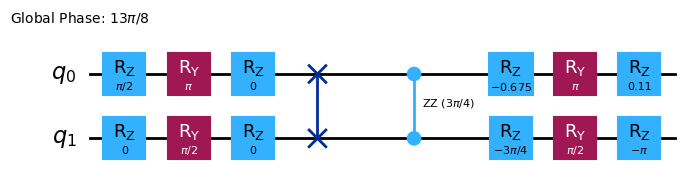

In [11]:
Fgate_4.draw('mpl')

In [12]:
Statevector(Fgate_4).draw('latex')

<IPython.core.display.Latex object>

In [13]:
Operator(Fgate_4).draw('latex')

<IPython.core.display.Latex object>

In [14]:
with open('Xgate.qpy', 'rb') as fd:
    Xgate = qpy.load(fd)[0]

with open('Fgate.qpy', 'rb') as fd:
    Fgate = qpy.load(fd)[0]

with open('Zgate.qpy', 'rb') as fd:
    Zgate = qpy.load(fd)[0]

with open('FDAGgate.qpy', 'rb') as fd:
    FDAGgate = qpy.load(fd)[0]

In [15]:
Operator(Fgate).draw('latex')

<IPython.core.display.Latex object>

In [16]:
Xgate4 = np.array([[0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]])
Xgate4 = TwoQubitWeylDecomposition(Xgate4).circuit().inverse()

In [17]:
Xgate4.name = 'X_4'

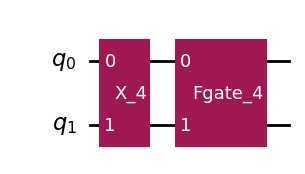

In [18]:
testqc = QuantumCircuit(2)
testqc.append(Xgate4, [0, 1])
#testqc.append(Xgate4, [0, 1])
#testqc.append(Xgate4, [0, 1])
#testqc.append(Xgate4, [0, 1])
testqc.append(Fgate_4, [0, 1])
testqc.draw('mpl')

In [19]:
Statevector(testqc).draw('latex')

<IPython.core.display.Latex object>

In [20]:
from IPython.display import display, Math

In [21]:
texts = ['$ F|0 \\rangle $', '$ F|1 \\rangle$',
        '$ F|2 \\rangle$', '$ F|3 \\rangle$']

for i in range(4):
    testqc = QuantumCircuit(2)
    for j in range(i):
        testqc.append(Xgate4, [0, 1])
    testqc.append(Fgate_4, [0, 1])
    display(Math(texts[i]))
    display(Statevector(testqc).draw('latex'))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

In [22]:
Zgate_4_mtx = np.diag([1, omega, pow(omega, 2), pow(omega, 3)])

In [23]:
Zgate_4_mtx.round(2)

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+1.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -0.-1.j]])

In [24]:
Zgate_4_mtx @ q0

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [25]:
Operator(Zgate_4_mtx).draw('latex')

<IPython.core.display.Latex object>

In [26]:
(Zgate_4_mtx @ q0).round(3)

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

In [27]:
Zgate_4 = TwoQubitWeylDecomposition(Zgate_4_mtx).circuit()

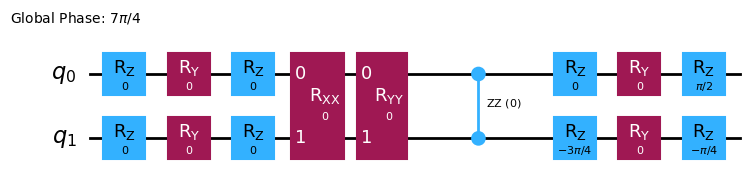

In [28]:
#Zgate_4.global_phase = 3*np.pi/4
Zgate_4.draw('mpl')

In [29]:
Operator(Zgate_4).draw('latex')

<IPython.core.display.Latex object>

In [30]:
Statevector(Zgate_4).draw('latex')

<IPython.core.display.Latex object>

In [31]:
texts = ['$ Z|0 \\rangle $', '$ Z|1 \\rangle$',
        '$ Z|2 \\rangle$', '$ Z|3 \\rangle$']

for i in range(4):
    testqcZ = QuantumCircuit(2)
    for j in range(i):
        testqcZ.append(Xgate4, [0, 1])
    testqcZ.append(Zgate_4, [0, 1])
    display(Math(texts[i]))
    display(Statevector(testqcZ).draw('latex'))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

In [32]:
print(f'omega = {omega.round(3)}')
print(f'omega^2 = {(omega**2).round(3)}')
print(f'omega^3 = {pow(omega, 3).round(3)}')

omega = 1j
omega^2 = (-1+0j)
omega^3 = (-0-1j)


In [33]:
Fgate_4.name = 'F_4'

In [34]:
with open('Zgate4.qpy', 'wb') as fd:
    qpy.dump(Zgate_4, fd)

In [35]:
with open('Xgate4.qpy', 'wb') as fd:
    qpy.dump(Xgate4, fd)

In [36]:
with open('Fgate4.qpy', 'wb') as fd:
    qpy.dump(Fgate_4, fd)

In [37]:
with open('CZ.qpy', 'rb') as fd:
    CZ = qpy.load(fd)[0]

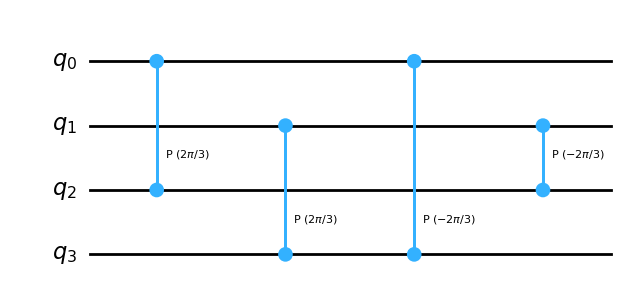

In [38]:
CZ.draw('mpl')

In [39]:
Statevector(Fgate).draw('latex')

<IPython.core.display.Latex object>

In [40]:
cztest = QuantumCircuit(4)
cztest.append(Xgate, [0, 1])
cztest.append(Xgate, [2, 3])
#cztest.append(CZ, [0, 1, 2, 3])

Statevector(cztest).draw('latex')

<IPython.core.display.Latex object>

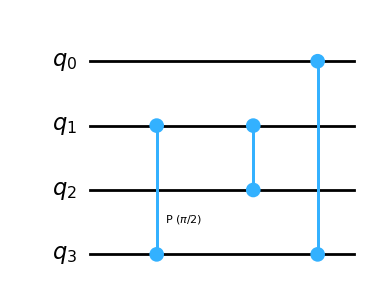

In [41]:
CZ4_qc = QuantumCircuit(4)
CZ4_qc.cp(np.pi/2, 1, 3)
CZ4_qc.cz(2, 1)
CZ4_qc.cz(3, 0)
CZ4_qc.draw('mpl')

In [42]:
testqcC = QuantumCircuit(4)
testqcC.append(Xgate4, [0, 1])
testqcC.append(Xgate4, [2, 3])
testqcC.append(Xgate4, [0, 1])
testqcC.append(Xgate4, [2, 3])

testqcC.append(CZ4_qc, [0, 1, 2, 3])

Statevector(testqcC).draw('latex')

<IPython.core.display.Latex object>

In [43]:
CZ4_qc.name = 'CZ_4'

In [44]:
with open('CZgate4.qpy', 'wb') as fd:
    qpy.dump(CZ4_qc, fd)

In [45]:
with open('Xgate4.qpy', 'rb') as fd:
    Xgate4 = qpy.load(fd)[0]

with open('Zgate4.qpy', 'rb') as fd:
    Zgate4 = qpy.load(fd)[0]

with open('Fgate4.qpy', 'rb') as fd:
    Fgate4 = qpy.load(fd)[0]

with open('CZgate4.qpy', 'rb') as fd:
    CZgate4 = qpy.load(fd)[0]

In [46]:
Operator(CZgate4).draw('latex')

<IPython.core.display.Latex object>

In [47]:
Fmtx_inv = Fmtx.conjugate().transpose()

In [48]:
Fgate4_inv = TwoQubitWeylDecomposition(Fmtx_inv).circuit()

In [49]:
texts = ['$ F|0 \\rangle $', '$ F^\\dagger |0 \\rangle $', '$ F|1 \\rangle$', '$ F^\\dagger |1 \\rangle $', '$ F|2 \\rangle$', '$ F^\\dagger |2 \\rangle $', '$ F|3 \\rangle$', '$ F^\\dagger |3 \\rangle $',]

for i in range(4):
    testqc = QuantumCircuit(2)
    for j in range(i):
        testqc.append(Xgate4, [0, 1])
    testqc.append(Fgate4, [0, 1])
    display(Math(texts[2 * i]))
    display(Statevector(testqc).draw('latex'))

    testqc = QuantumCircuit(2)
    for j in range(i):
        testqc.append(Xgate4, [0, 1])
    testqc.append(Fgate4_inv, [0, 1])
    display(Math(texts[2 * i + 1]))
    display(Statevector(testqc).draw('latex'))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

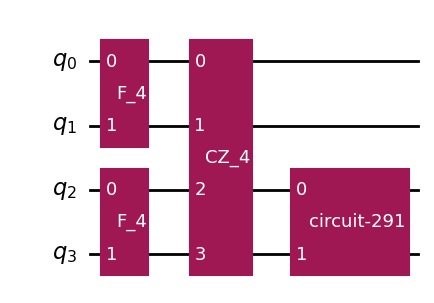

In [50]:
ququart2 = QuantumCircuit(4)
ququart2.append(Fgate4, [0, 1])
ququart2.append(Fgate4, [2, 3])
ququart2.append(CZgate4, [0, 1, 2, 3])

ququart2.append(Fgate4_inv, [2, 3])

ququart2.draw('mpl')

In [51]:
Statevector(ququart2).draw('latex')

<IPython.core.display.Latex object>

In [52]:
Statevector(ququart2).draw('latex')

<IPython.core.display.Latex object>

In [53]:
len(Statevector(ququart2))

16

In [54]:
Statevector(ququart2).data.round(3)

array([ 0.5 -0.j  , -0.  -0.j  , -0.  +0.j  ,  0.  +0.j  , -0.  -0.j  ,
        0.25-0.25j,  0.25+0.j  , -0.  +0.25j, -0.  +0.j  ,  0.  -0.j  ,
        0.25+0.25j,  0.25-0.25j,  0.  -0.j  ,  0.25+0.25j,  0.  -0.25j,
        0.25+0.j  ])

In [55]:
Operator(Fgate4).equiv(Operator(Fgate4_inv).adjoint())

True

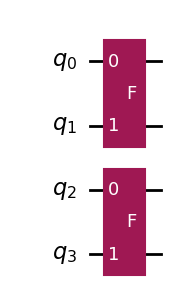

In [56]:
qc_3ghz = QuantumCircuit(4)
qc_3ghz.append(Fgate, [0, 1])
qc_3ghz.append(Fgate, [2, 3])
qc_3ghz.draw('mpl')

In [57]:
len(Statevector(qc_3ghz))

16

In [58]:
Statevector(qc_3ghz).draw('latex')

<IPython.core.display.Latex object>

In [59]:
Statevector(qc_3ghz).data.round(2)

array([ 0.33-0.j,  0.33-0.j,  0.33-0.j,  0.  -0.j,  0.33-0.j,  0.33-0.j,
        0.33-0.j,  0.  -0.j,  0.33-0.j,  0.33-0.j,  0.33-0.j,  0.  -0.j,
        0.  -0.j, -0.  -0.j,  0.  -0.j,  0.  -0.j])

In [60]:
H4_mtx = 0.5 * np.array([[1, 1, 1, 1], [1, 1j, -1, -1j], [1, -1, 1, -1], [1, -1j, -1, 1j]])

In [61]:
H4 = TwoQubitWeylDecomposition(H4_mtx).circuit()

In [62]:
H4.global_phase = 5 * np.pi / 8

In [63]:
Operator(H4).draw('latex')

<IPython.core.display.Latex object>

In [118]:
Operator(Fgate4).draw('latex')

<IPython.core.display.Latex object>

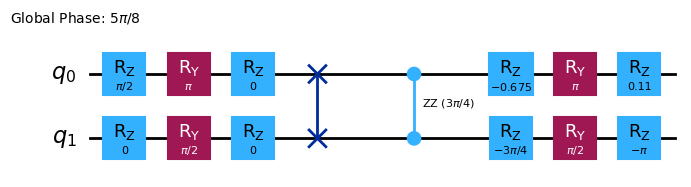

In [64]:
H4.draw('mpl')

In [65]:
Statevector(H4).draw('latex')

<IPython.core.display.Latex object>

In [66]:
H4.name = "H4"

In [67]:
H4mtx_inv = H4_mtx.conjugate().transpose()

In [68]:
H4inv = TwoQubitWeylDecomposition(H4mtx_inv).circuit()

In [69]:
H4inv.name = "H4inv"

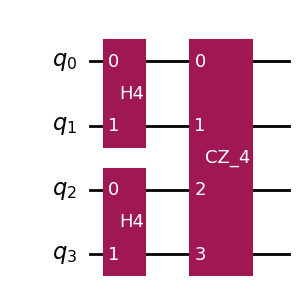

In [110]:
test_H = QuantumCircuit(4)
test_H.append(H4, [0, 1])
test_H.append(H4, [2, 3])

test_H.append(CZgate4, [0, 1, 2, 3])

#test_H.append(H4inv, [0, 1])

test_H.draw('mpl')

In [111]:
Statevector(test_H).draw('latex')

<IPython.core.display.Latex object>

In [115]:
partial_trace(Statevector(test_H), [0, 1, 2]).draw('latex')

<IPython.core.display.Latex object>

In [72]:
cz_test = (np.kron(np.identity(4), proj(q0, q0)) + np.kron(Operator(Zgate4).to_matrix(), proj(q1, q1))).round(3)

In [73]:
qubit0 = np.array([[1], [0]])
qubit1 = np.array([[0], [1]])

In [74]:
np.kron(proj(qubit0, qubit0), proj(qubit0, qubit0)) + np.kron(proj(qubit0, qubit0), proj(qubit1, qubit1)) + np.kron(proj(qubit1, qubit1), proj(qubit0, qubit0)) - np.kron(proj(qubit1, qubit1), proj(qubit1, qubit1))

array([[ 1,  0,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  0, -1]])

In [75]:
qutryt0 = np.kron(qubit0, qubit0)
qutryt1 = np.kron(qubit0, qubit1)
qutryt2 = np.kron(qubit1, qubit0)
qutryt3 = np.kron(qubit1, qubit1)

q0 = qutryt0
q1 = qutryt1
q2 = qutryt2
q3 = qutryt3

In [76]:
a0 = np.kron(proj(q0, q0), proj(q0, q0)) + np.kron(proj(q0, q0), proj(q1, q1)) + np.kron(proj(q0, q0), proj(q2, q2)) + np.kron(proj(q0, q0), proj(q3, q3))

In [77]:
omega

np.complex128(6.123233995736766e-17+1j)

In [78]:
a1 = np.kron(proj(q1, q1), proj(q0, q0)) + omega * np.kron(proj(q1, q1), proj(q1, q1)) + pow(omega, 2) * np.kron(proj(q1, q1), proj(q2, q2)) + pow(omega, 3) * np.kron(proj(q1, q1), proj(q3, q3))

In [79]:
a2 = np.kron(proj(q2, q2), proj(q0, q0)) + pow(omega, 2) * np.kron(proj(q2, q2), proj(q1, q1)) + pow(omega, 4) * np.kron(proj(q2, q2), proj(q2, q2)) + pow(omega, 6) * np.kron(proj(q2, q2), proj(q3, q3))

In [80]:
a3 = np.kron(proj(q3, q3), proj(q0, q0)) + pow(omega, 3) * np.kron(proj(q3, q3), proj(q1, q1)) + pow(omega, 6) * np.kron(proj(q3, q3), proj(q2, q2)) + pow(omega, 9) * np.kron(proj(q3, q3), proj(q3, q3))

In [81]:
a = a1 + a2 + a3

In [83]:
b0 = np.kron(proj(qutryt0, qutryt0), proj(qutryt0, qutryt0)) + np.kron(proj(qutryt0, qutryt0), proj(qutryt1, qutryt1)) + np.kron(proj(qutryt0, qutryt0), proj(qutryt2, qutryt2))

In [84]:
b1 = np.kron(proj(qutryt1, qutryt1), proj(qutryt0, qutryt0)) + pow(omega3, 1) * np.kron(proj(qutryt1, qutryt1), proj(qutryt1, qutryt1)) + pow(omega3, 2) * np.kron(proj(qutryt1, qutryt1), proj(qutryt2, qutryt2))

In [85]:
b2 = np.kron(proj(qutryt2, qutryt2), proj(qutryt0, qutryt0)) + pow(omega, 2) * np.kron(proj(qutryt2, qutryt2), proj(qutryt1, qutryt1)) + pow(omega, 4) * np.kron(proj(qutryt2, qutryt2), proj(qutryt2, qutryt2))

In [86]:
b = b0 + b1 + b2

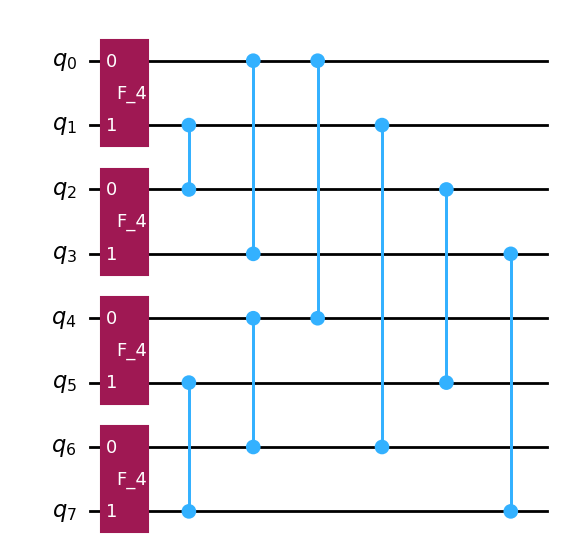

In [94]:
qc_paper = QuantumCircuit(8)
# for i in range(8):
#     qc_paper.h(i)

for i in range(4):
    qc_paper.append(Fgate4, [2*i, 2*i + 1])

qc_paper.cz(1, 2)
qc_paper.cz(5, 7)
qc_paper.cz(0, 3)
qc_paper.cz(4, 6)
qc_paper.cz(0, 4)
qc_paper.cz(1, 6)
qc_paper.cz(2, 5)
qc_paper.cz(3, 7)
qc_paper.draw('mpl')

In [95]:
Statevector(qc_paper).draw('latex')

<IPython.core.display.Latex object>

In [117]:
partial_trace(Statevector(qc_paper), [0, 1]).draw('latex')

<IPython.core.display.Latex object>

In [109]:
cz_test = QuantumCircuit(8)
cz_test.cz(1, 2)
cz_test.cz(5, 7)
cz_test.cz(0, 3)
cz_test.cz(4, 6)
cz_test.cz(0, 4)
cz_test.cz(1, 6)
cz_test.cz(2, 5)
cz_test.cz(3, 7)
np.diag(Operator(cz_test).data)

array([ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j,
       -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,
       -1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
       -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j,
        1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,
       -1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j,
        1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j,
       -1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j, -1.+0.j,
       -1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,
        1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j,
       -1.+0.j, -1.+